_This notebook is used for training the model_

# Building the model

In [2]:
# install pip3 install --upgrade pip from terminal of vscode

In [3]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/nheechan/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/nheechan/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/nheechan/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/nheechan/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/nheechan/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_da

True

In [4]:
import numpy as np
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import joblib ## to save the model

In [5]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

In [6]:
import matplotlib.pyplot as plt

## Import data

In [7]:
kaggle = pd.read_csv('/Users/nheechan/Desktop/DATA MINING/SVM/kaggle.csv')

In [8]:
kaggle

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [9]:
kaggle['text'].str.contains('(Reuters)').sum()

/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_7591/1522429420.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  kaggle['text'].str.contains('(Reuters)').sum()


22234

In [10]:
# Define a function to remove all words up to and including "(reuters)"
def clean_text(text):
    if pd.isna(text):  # Handle NaN values
        return text
    return re.sub(r'^.*?\(reuters\)\s*', '', text, flags=re.IGNORECASE)

In [11]:
kaggle['text'] = kaggle['text'].apply(clean_text)
kaggle

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,- Hackers believed to be working for the Russi...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,- Donald Trump’s combative style has buffeted ...,0


In [12]:
kaggle.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
kaggle

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...
72129,Russians steal research on Trump in hack of U....,- Hackers believed to be working for the Russi...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,- Donald Trump’s combative style has buffeted ...,0


## Process Data

In [14]:
## convert texts to lowercase
kaggle['text'] = kaggle['text'].str.lower()
kaggle

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,no comment is expected from barack obama membe...,1
1,NaN,did they post their votes for hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",a dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"the rs-28 sarmat missile, dubbed satan 2, will...",1
...,...,...,...
72129,Russians steal research on Trump in hack of U....,- hackers believed to be working for the russi...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"you know, because in fantasyland republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,migrants refuse to leave train at refugee camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,- donald trump’s combative style has buffeted ...,0


In [15]:
## remove empty texts
df = kaggle.dropna(subset=['text'])
df

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,no comment is expected from barack obama membe...,1
1,NaN,did they post their votes for hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",a dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"the rs-28 sarmat missile, dubbed satan 2, will...",1
...,...,...,...
72129,Russians steal research on Trump in hack of U....,- hackers believed to be working for the russi...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"you know, because in fantasyland republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,migrants refuse to leave train at refugee camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,- donald trump’s combative style has buffeted ...,0


In [16]:
df['text'].isna().sum()

0

In [17]:
## tokenize the texts
def tokenize(row):
    text = row['text']
    tokens = word_tokenize(text)
    tokens_final = [w for w in tokens if w.isalnum()] # taken only words and numbers (not punctuation)
    return tokens_final

In [18]:
df['tokens'] = df.apply(tokenize, axis=1)

/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_7591/1800641699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df.apply(tokenize, axis=1)


In [19]:
# remove stopwords
stops = set(stopwords.words("english"))

def remove_stops(row):
    tokens = row['tokens']
    tokens_final = [w for w in tokens if w not in stops]
    return tokens_final 
## df['stops_removed'] = df.apply(remove_stops, axis=1)

In [20]:
df['stops_removed'] = df.apply(remove_stops, axis=1)

/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_7591/1333563868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stops_removed'] = df.apply(remove_stops, axis=1)


In [21]:
## lemmatizing
lemmatizer = WordNetLemmatizer()

def lemmatize(row):
    tokens = row['stops_removed']
    lemmatized= [lemmatizer.lemmatize(w) for w in tokens]
    return (lemmatized)


In [22]:
df['lemmatized'] = df.apply(lemmatize, axis=1)

/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_7591/1758103225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized'] = df.apply(lemmatize, axis=1)


In [23]:
## rejoin all the tokens in each row
def rejoin(row):
    tokens = row['lemmatized']
    joined = ' '.join(tokens)
    return joined

In [24]:
df['cleaned_text'] = df.apply(rejoin, axis=1)

/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_7591/1749124897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df.apply(rejoin, axis=1)


In [25]:
df2 = df[['lemmatized','cleaned_text', 'label']]
df2

,lemmatized,cleaned_text,label
0,"[comment, expected, barack, obama, member, fyf...",comment expected barack obama member fyf911 fu...,1
1,"[post, vote, hillary, already]",post vote hillary already,1
2,"[demonstrator, gathered, last, night, exercisi...",demonstrator gathered last night exercising co...,1
3,"[dozen, politically, active, pastor, came, pri...",dozen politically active pastor came private d...,0
4,"[sarmat, missile, dubbed, satan, 2, replace, f...",sarmat missile dubbed satan 2 replace fly mile...,1
...,...,...,...
72129,"[hacker, believed, working, russian, governmen...",hacker believed working russian government bro...,0
72130,"[know, fantasyland, republican, never, questio...",know fantasyland republican never questioned c...,1
72131,"[migrant, refuse, leave, train, refugee, camp,...",migrant refuse leave train refugee camp hungar...,0
72132,"[donald, trump, combative, style, buffeted, me...",donald trump combative style buffeted mexico p...,0


In [22]:
df2.to_csv("kaggle_cleaned.csv")

## Train and Test on cleaned dataset

In [4]:
df2 = pd.read_csv('/Users/nheechan/Desktop/DATA MINING/Group Project/kaggle_cleaned.csv')

In [5]:
np.random.seed(500) ## ensure reproducibility

In [6]:
train_X, test_X, train_Y, test_Y = train_test_split(df2['lemmatized'], df2['label'], test_size=0.2)

## Vectorization

In [7]:
## using TF-IDF (Term Frequency - Inverse Document Frequency) method to convert text into numerical vectors for the model
Tdif_vect = TfidfVectorizer(max_features=5000)
Tdif_vect.fit(train_X)

TfidfVectorizer(max_features=5000)

In [8]:
train_X_Tdif = Tdif_vect.transform(train_X)
test_X_Tdif = Tdif_vect.transform(test_X)

In [9]:
print(Tdif_vect.vocabulary_) ## print the count for each word

{'representative': 3765, 'david': 1203, 'ended': 1562, 'bid': 567, 'senate': 4013, 'seat': 3980, 'florida': 1839, 'friday': 1908, 'opening': 3116, 'way': 4868, 'marco': 2753, 'rubio': 3898, 'seek': 3995, 'effort': 1506, 'help': 2120, 'republican': 3770, 'maintain': 2724, 'control': 1067, 'chamber': 801, 'saying': 3945, 'getting': 1968, 'fellow': 1777, 'running': 3904, 'fill': 1798, 'past': 3239, '10': 1, 'month': 2902, 'said': 3920, 'cnn': 898, 'dropped': 1457, 'race': 3590, 'presidential': 3434, 'nomination': 3026, 'later': 2562, 'represents': 3768, 'area': 358, 'around': 370, 'run': 3903, 'congressional': 1012, 'today': 4564, 'asking': 388, 'friend': 1909, 'neighbor': 2991, 'let': 2615, 'continue': 1055, 'job': 2451, 'member': 2814, 'congress': 1011, 'news': 3008, 'conference': 998, 'likely': 2645, 'face': 1717, 'former': 1874, 'governor': 2004, 'charlie': 819, 'democrat': 1273, 'election': 1518, 'march': 2752, 'week': 4881, 'may': 2783, 'decide': 1224, 'early': 1474, 'weekend': 4882

In [14]:
print(train_X_Tdif)
## first column is the row number
## second column is the unique number of each word in that row
## third column is the TF-IDF score for that word in that row

  (0, 4953)	0.13709766846658084
  (0, 4825)	0.11136614220931691
  (0, 4659)	0.049357910778051246
  (0, 4561)	0.05044669530029453
  (0, 4330)	0.2565098459973382
  (0, 4225)	0.09020035221680907
  (0, 3928)	0.03761780930309762
  (0, 3909)	0.11044277752325048
  (0, 3670)	0.13972615453202078
  (0, 3668)	0.30074962647024556
  (0, 3467)	0.09952966168802962
  (0, 3445)	0.04786280807423692
  (0, 3373)	0.07386545288904821
  (0, 3243)	0.06920054910274251
  (0, 3140)	0.26268412316935347
  (0, 2959)	0.288827363140526
  (0, 2940)	0.0843502445210407
  (0, 2872)	0.08696479444559616
  (0, 2743)	0.058841648142295935
  (0, 2628)	0.08346099035692076
  (0, 2451)	0.4401445187815719
  (0, 2422)	0.363626154950942
  (0, 2116)	0.10511824224950245
  (0, 1956)	0.13563856605061955
  (0, 1656)	0.1399257957503486
  :	:
  (50465, 3872)	0.1642901269974137
  (50465, 3833)	0.09824490431488496
  (50465, 3804)	0.13719494250120737
  (50465, 3800)	0.13990254860097015
  (50465, 3799)	0.14145556615835964
  (50465, 3726)	0.103

In [10]:
joblib.dump(Tdif_vect, 'Tdif_vect.pkl') ## save the vectorizer

['Tdif_vect.pkl']

In [8]:
Tdif_vect = joblib.load('Tdif_vect.pkl') ## load the vectorizer
Tdif_vect.fit(train_X)
## and then transform train_X and test_X again (the cell above)

TfidfVectorizer(max_features=5000)

## Fit the model

### Linear function

In [11]:
## Only run this if want to retrain the model
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(train_X_Tdif, train_Y)

SVC(gamma='auto', kernel='linear')

In [20]:
SVM = joblib.load('svm_model.pkl') ## load the model again after restarting
##SVM.fit(train_X_Tdif, train_Y)

In [12]:
prediction = SVM.predict(test_X_Tdif)
accuracy_score(prediction, test_Y)

0.9352243567515084

In [13]:
from sklearn.metrics import confusion_matrix
conMat = confusion_matrix(test_Y, prediction)
print(conMat)

[[6606  482]
 [ 452 6879]]


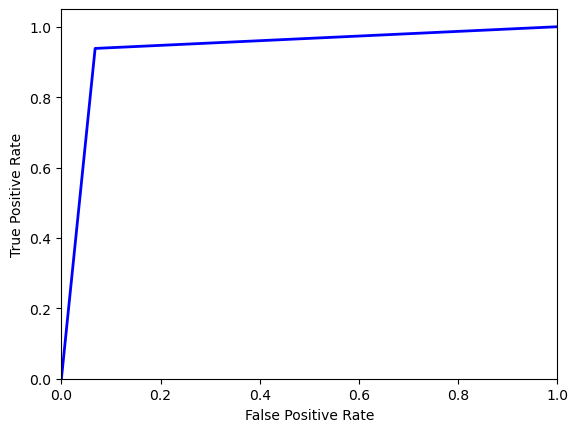

In [16]:
## Plot ROC curve
tp, fp, threshold = roc_curve(test_Y, prediction)
roc_auc = auc(tp, fp)
plt.figure()  
plt.plot(tp, fp, color='blue', lw=2)
##plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')   
plt.ylabel('True Positive Rate')
plt.show()

In [17]:
print("Precision: ", precision_score(test_Y, prediction, average='weighted'))
print("Recall: ", recall_score(test_Y, prediction, average='weighted'))
print("F1 Score: ", f1_score(test_Y, prediction, average='weighted'))

Precision:  0.9352273516101741
Recall:  0.9352243567515084
F1 Score:  0.9352218041615129


In [18]:
print(classification_report(test_Y, prediction))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7088
           1       0.93      0.94      0.94      7331

    accuracy                           0.94     14419
   macro avg       0.94      0.94      0.94     14419
weighted avg       0.94      0.94      0.94     14419



In [19]:
# Save the trained SVM model
joblib.dump(SVM, "svm_model.pkl")

['svm_model.pkl']

In [5]:
joblib.load("svm_model.pkl")

SVC(gamma='auto', kernel='linear')

In [42]:
linear2 = svm.SVC(kernel='linear')
linear2.fit(train_X_Tdif, train_Y)

SVC(kernel='linear')

In [43]:
pred_linear2 = linear2.predict(test_X_Tdif)
cm_linear2 = confusion_matrix(test_Y, pred_linear2)
print(cm_linear2)

[[ 9875   727]
 [  675 10352]]


In [44]:
print(accuracy_score(pred_linear2, test_Y))

0.9351796199546905


### Experimenting different params

In [11]:
gammas = [0.1, 1, 10, 100]
for gamma in gammas:
  svc = svm.SVC(kernel='linear', gamma=gamma).fit(train_X_Tdif, train_Y)
  print(gamma, svc.score(test_X_Tdif, test_Y))

0.1 0.9351796199546905
1 0.9351796199546905
10 0.9351796199546905
100 0.9351796199546905


### Sigmoid function

In [42]:
#SVM2 = svm.SVC(kernel='sigmoid')
#SVM2.fit(train_X_Tdif, train_Y)

gammas = [0.1, 1, 10, 100]
for gamma in gammas:
  svc = svm.SVC(kernel='sigmoid', gamma=gamma).fit(train_X_Tdif, train_Y)
  print(gamma, svc.score(test_X_Tdif, test_Y))

0.1 0.9208007767349392
1 0.9240371723149475
10 0.7667945813491146
100 0.5468121503536918


In [92]:
# Save the trained SVM model
joblib.dump(SVM2, "svm2_model.pkl")

['svm2_model.pkl']

### Poly function

In [10]:
Tdif_vect = joblib.load("Tdif_vect.pkl")
Tdif_vect.fit(train_X)
train_X_Tdif = Tdif_vect.transform(train_X)
test_X_Tdif = Tdif_vect.transform(test_X)

In [11]:
svc_poly = svm.SVC(kernel='poly', gamma=1).fit(train_X_Tdif, train_Y)
print(svc_poly.score(test_X_Tdif, test_Y))

0.9225114429700865


### rbf

In [43]:
gammas = [0.1, 1, 10, 100]
for gamma in gammas:
  svc = svm.SVC(kernel='rbf', gamma=gamma).fit(train_X_Tdif, train_Y)
  print(gamma, svc.score(test_X_Tdif, test_Y))

0.1 0.9265800545563826


## SVM (But fit_ transform on the whole dataset)
Discard this model

In [7]:
## using TF-IDF (Term Frequency - Inverse Document Frequency) method to convert text into numerical vectors for the model
Tdif_vect2 = TfidfVectorizer(max_features=5000)
Tdif_vect2.fit(df2['lemmatized'])

TfidfVectorizer(max_features=5000)

In [8]:
trainX_vect = Tdif_vect2.transform(train_X)
testX_vect = Tdif_vect2.transform(test_X)

In [9]:
model = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
model.fit(trainX_vect, train_Y)

SVC(gamma='auto', kernel='linear')

In [10]:
pred = model.predict(testX_vect)
print(accuracy_score(pred, test_Y))

0.9343474039484027


In [27]:
conMat3 = confusion_matrix(test_Y, pred)
print(conMat3)

[[ 9861   741]
 [  679 10348]]


In [11]:
joblib.dump(model, "model.pkl")
joblib.dump(Tdif_vect2, "Tdif_vect2.pkl")

['Tdif_vect2.pkl']

# Function to input the news

In [8]:
def process_text(text):
    ## cleaned = clean_text(text)
    cleaned_lower = text.lower()
    tokens = nltk.word_tokenize(cleaned_lower)
    tokens2 = [w for w in tokens if w.isalnum()]
    
    stops = set(stopwords.words("english"))
    tokens = [w for w in tokens2 if w not in stops]
    
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(w) for w in tokens]
    
    joined_words = (' '.join(lemmatized))
    return joined_words

In [6]:
SVM = joblib.load("svm_model.pkl")
Tdif_vect = joblib.load("Tdif_vect.pkl")

In [26]:
def detect(text):
    processed = process_text(text)
    myX_Tdif = Tdif_vect.transform([processed]) ## wrap the text in a list for vectorizer to transform
    prediction = SVM.predict(myX_Tdif)
    if(prediction == 1):
        return "Fake News"
    else:
        return "Real News"

In [27]:
detect("But under the surface, some GOP lawmakers are growing concerned by the effort to usurp Congress’ control of the federal purse strings. And they’re dealing with a deluge of calls from worried constituents and federal workers who are looking to their elected officials for answers. Some are taking action, testing the waters for what a new era of pushback in a second Trump term looks like. GOP Rep. Don Bacon of Nebraska, who supports the idea of auditing the federal government, has asked the Trump administration to go line by line through US Agency for International Development funding and pushed them to preserve the programs that serve the country’s national security interests. “Instead of getting rid of everything, let’s look at it selectively,” Bacon said. “Don’t throw the baby out with the bath water.")

'Fake News'

In [28]:
detect("Fogel arrived at the White House late Tuesday draped in an American flag and was greeted by Trump, who said it was “an honor to have played a small role” in his release. “Thank you all, and I love our country, and I’m so happy to be back here. And I wish I could articulate it better,” said Fogel, who appeared overwhelmed with emotion as he spoke in the Diplomatic Reception Room. The deal to release Fogel, who was designated as wrongfully detained by the US State Department, was negotiated by Trump, Special Envoy for the Middle East Steve Witkoff, “and the President’s advisers,” according to a statement from national security adviser Mike Waltz. The statement did not provide any details about the “exchange,” other than to say it was “a show of good faith from the Russians and a sign we are moving in the right direction to end the brutal and terrible war in Ukraine.”")

'Real News'

In [29]:
detect("Emergency crews were called to the Woorim Beach at Bribie Island, about 80 kms (50 miles) north of Brisbane around 5 p.m. local time on Monday following reports of a serious shark bite incident, Queensland state police said on Monday. “The female was swimming when she was bitten by a shark … the female sustained life-threatening injuries and succumbed to those injuries,” a police spokesperson said in an email. Police did not disclose the age of the victim though Australian media widely reported the victim was a 17-year-old girl. Christopher Potter, a resident, said the beach is frequently used by swimming groups through the day. “It’s known there are a lot of sharks around Bribie, but this close to shore, it’s still a shock,” he told Australian public broadcaster ABC News.")

'Real News'

In [30]:
detect("But this sleepy city tucked away on the west coast of the island of Hokkaido has become the latest flashpoint in Japan’s ongoing battle against overtourism. Local authorities recently deployed security guards to remind tourists to refrain from unruly behaviors, including trespassing onto private premises and obstructing road traffic. The increased focus on foreign travelers follows the death of a Hong Kong woman on the outskirts of Otaru. The 61-year-old tourist was hit and killed by a train on January 24 while reportedly snapping photos on the tracks at Asari Station, known for its view of the coastline juxtaposed by trains passing through the snow. However, Otaru City Hall officials told CNN tourists had been causing disruptions since before the traveler’s death. Otaru, which has a population of about 100,000 people, recorded 98,678 overnight international visitors last year, the highest number on record. That figure doesn’t include those making day trips from Sapporo, Hokkaido’s capital, about 25 miles (40 kilometers) southeast.")

'Fake News'

In [31]:
detect("Reps. Darin LaHood, a Republican from Illinois, and Josh Gottheimer, a New Jersey Democrat, are set to propose legislation on Friday that would ban the use of DeepSeek on government devices over national security concerns. DeepSeek is just the latest target in a larger battle for tech supremacy between the United States and China. The attempted crackdown comes weeks after DeepSeek shocked Silicon Valley and Wall Street by releasing an advanced AI model, called R1, with the same capabilities as top American models, despite being cheaper to train and less power-hungry. The model — from a year-old Chinese startup subject to US export restrictions on the most powerful AI chips — has fueled concerns that the United States could fall behind China in AI. If passed, the proposed bill would give 60 days for government agencies to develop standards and guidelines for removing DeepSeek — as well as any other app developed by its parent company, High Flyer — from official devices. The proposal follows similar moves by Australia, Italy and Taiwan. DeepSeek did not respond to a request for comment.")

'Fake News'